# Examen d’analyse et visualisation des données___Groupe4

Par :

| Nom       | Postnom     | Prénom     |
|-----------|-------------|------------|
| Dyese     | Estelle     | Celeste    |
| Kabongo   | Kalonji     | Jenovic    |
| kensesse  | Itela       | Josephat   |
| Ntwari    | Benito      | Elie       |
| Sedou     | Legbiande   | Diane      |
| Tshibangu | Bukasa      | Daniel     |


UNIVERSITE PROTESTANTE AU CONGO L3 DATASCIENCE *EXAMEN ANALYSE ET VISUALISATION DES DONNEES*

## Introduction

Dans le cadre de cette analyse, nous allons explorer la base de données `donnees_fabrication_electronique` afin de mieux comprendre les facteurs influençant les performances des machines dans un processus de fabrication électronique.

L'étude est structurée en cinq grandes parties :

1. **Description des données** : Analyse de la structure du DataFrame, résumés statistiques, et calculs de moyennes simples et groupées.
2. **Compréhension des données** : Analyse des distributions, corrélations entre variables, et interprétation graphique.
3. **Généralisation des résultats** : Estimations d’intervalles de confiance et échantillonnage Bootstrap pour la robustesse des conclusions.
4. **Tests d’hypothèses** : Formulation et validation de tests statistiques pour vérifier des suppositions sur les données.
5. **Visualisations** : Représentation graphique des variables clés à l’aide de visualisations appropriées pour une meilleure compréhension.

Ce notebook a pour objectif de combiner des outils statistiques et graphiques afin de dégager des tendances pertinentes dans les données industrielles analysées.


In [3]:
# CHARGEMENT DES DONNNEES
import pandas as pd

df = pd.read_csv('donnees_fabrication_electronique.csv')

# I. DESCRIPTION DES DONNEES 

> # I.1. Analyse et résumé de la structure de la table

Nous affichons ici la structure du DataFrame, ses colonnes, types et valeurs nulles éventuelles.

In [4]:
df.head()

,Date,Piece_ID,Machine_ID,Operator_ID,Temperature_C,Humidity_Percent,Vibration_Amplitude_mm,Current_mA,Voltage_V,Defect_Count,Cycle_Time_s
0,2024-01-01,ELEC_PART_0000,M_003,OP_B,22.3,58.1,-4.87,234.92,23.96,0,57.80
1,2024-01-02,ELEC_PART_0001,M_004,OP_B,29.1,44.7,-2.04,476.63,15.98,2,36.57
2,2024-01-03,ELEC_PART_0002,M_001,OP_B,20.0,56.1,-0.41,311.89,11.56,1,29.99
3,2024-01-04,ELEC_PART_0003,M_003,OP_C,25.6,41.2,-0.89,392.96,10.43,2,57.69
4,2024-01-05,ELEC_PART_0004,M_003,OP_A,27.6,58.0,2.22,469.64,20.18,0,42.11


In [5]:
print("==== STRUCTURE DU DATAFRAME ====")
print(df.info()) 

==== STRUCTURE DU DATAFRAME ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1023 non-null   object 
 1   Piece_ID                1023 non-null   object 
 2   Machine_ID              1023 non-null   object 
 3   Operator_ID             1023 non-null   object 
 4   Temperature_C           1023 non-null   float64
 5   Humidity_Percent        1023 non-null   float64
 6   Vibration_Amplitude_mm  1023 non-null   float64
 7   Current_mA              1023 non-null   float64
 8   Voltage_V               1023 non-null   float64
 9   Defect_Count            1023 non-null   int64  
 10  Cycle_Time_s            1023 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 88.0+ KB
None


### STRUCTURE DU DATAFRAME

Le DataFrame `donnees_fabrication_electronique` contient **1023 observations** réparties sur **11 colonnes**. Il comprend à la fois des variables qualitatives (comme `Date`, `Piece_ID`, `Machine_ID`, `Operator_ID`) et des variables quantitatives (comme `Temperature_C`, `Humidity_Percent`, `Vibration_Amplitude_mm`, etc.).

Les types de données sont bien définis :  
- 6 colonnes de type `float64` (valeurs continues),
- 1 colonne de type `int64` (valeurs discrètes),
- 4 colonnes de type `object` (catégorielles ou dates non encore converties).

Aucune valeur manquante n’est présente, ce qui rend l’ensemble des variables exploitables sans nettoyage préalable.


> # I.2. Résumer du DataFrame et interprétation des résultats.

Nous présentons un résumé statistique complet (count, mean, std, min, 25%, 50%, 75%, max) pour interpréter la distribution des données.

In [6]:
# 1.2 Résumé du DataFrame et interprétation
print("\n==== RESUME STATISTIQUE DES DONNEES ====")
print(df.describe())  # Statistiques descriptives sur les colonnes numériques


==== RESUME STATISTIQUE DES DONNEES ====
       Temperature_C  Humidity_Percent  Vibration_Amplitude_mm   Current_mA  \
count    1023.000000       1023.000000             1023.000000  1023.000000   
mean       24.934311         50.193939                0.031593   296.064878   
std         2.853916          5.782263                2.866992   113.844995   
min        20.000000         40.000000               -4.990000   100.070000   
25%        22.400000         45.100000               -2.425000   199.245000   
50%        25.000000         50.500000                0.120000   292.910000   
75%        27.400000         55.300000                2.540000   394.665000   
max        30.000000         60.000000                4.980000   499.010000   

         Voltage_V  Defect_Count  Cycle_Time_s  
count  1023.000000   1023.000000   1023.000000  
mean     16.783255      0.965787     34.194555  
std       4.157730      0.810766     14.270490  
min      10.010000      0.000000     10.010000  
2

### RÉSUMÉ STATISTIQUE DES DONNÉES 

Le tableau ci-dessous présente les statistiques descriptives des variables numériques du DataFrame `donnees_fabrication_electronique`.

| Variable                  | Moyenne   | Écart-type | Min     | 25%     | Médiane | 75%     | Max     |
|---------------------------|-----------|------------|---------|---------|---------|---------|---------|
| Temperature_C             | 24.93     | 2.85       | 20.00   | 22.40   | 25.00   | 27.40   | 30.00   |
| Humidity_Percent          | 50.19     | 5.78       | 40.00   | 45.10   | 50.50   | 55.30   | 60.00   |
| Vibration_Amplitude_mm    | 0.03      | 2.87       | -4.99   | -2.43   | 0.12    | 2.54    | 4.98    |
| Current_mA                | 296.06    | 113.84     | 100.07  | 199.25  | 292.91  | 394.66  | 499.01  |
| Voltage_V                 | 16.78     | 4.16       | 10.01   | 13.08   | 16.77   | 20.29   | 24.00   |
| Defect_Count              | 0.97      | 0.81       | 0       | 0       | 1       | 2       | 2       |
| Cycle_Time_s              | 34.19     | 14.27      | 10.01   | 21.98   | 34.26   | 45.78   | 59.95   |

> **Interprétation**

- Les variables comme **Temperature_C** et **Humidity_Percent** montrent une distribution relativement centrée autour de leur moyenne, avec des valeurs comprises dans des intervalles standards (20–30°C et 40–60%).
- La variable **Vibration_Amplitude_mm** présente une moyenne proche de zéro mais un écart-type très élevé (2.87), ce qui indique une **forte dispersion** et la présence de **valeurs négatives**.
- **Current_mA** et **Voltage_V** sont bien répartis, mais l'écart-type de `Current_mA` montre aussi une grande variabilité.
- **Defect_Count** est une variable discrète avec une médiane à 1 , ce qui indique que la majorité des pièces contiennent peu de défauts.
- **Cycle_Time_s** varie entre 10 et 60 secondes, avec une médiane autour de 34 s — une variable à surveiller car elle peut influencer la qualité et la productivité.

Ce résumé permet de repérer les premières tendances, d’identifier les variables avec des distributions asymétriques, et de cibler celles nécessitant une attention particulière dans l’analyse approfondie.


> # I.3. Calcule de la moyenne de vibration_amplitude.

Calcul de la moyenne globale de la colonne vibration_amplitude.

In [7]:
# 1.3 Calcul de la moyenne de vibration_amplitude
moyenne_vibration = df['Vibration_Amplitude_mm'].mean()
print(f"\n==== MOYENNE GLOBALE DE VIBRATION_AMPLITUDE ====\n{moyenne_vibration}")


==== MOYENNE GLOBALE DE VIBRATION_AMPLITUDE ====
0.03159335288367543


> # I.4. Calcul de la vibration d’amplitude moyenne en fonction de machine_ID et Operator_ID et  Interprétation des résultats.

In [10]:
# 1.4 Vibration d’amplitude moyenne en fonction de machine_ID et Operator_ID
moyenne_grouped = df.groupby(['Machine_ID', 'Operator_ID'])['Vibration_Amplitude_mm'].mean().reset_index()
print("\n==== MOYENNE DE VIBRATION_AMPLITUDE PAR MACHINE ET OPERATEUR ====")
print(moyenne_grouped)


==== MOYENNE DE VIBRATION_AMPLITUDE PAR MACHINE ET OPERATEUR ====
   Machine_ID Operator_ID  Vibration_Amplitude_mm
0       M_001        OP_A               -0.167397
1       M_001        OP_B               -0.253608
2       M_001        OP_C                0.193673
3       M_002        OP_A               -0.598723
4       M_002        OP_B                0.115270
5       M_002        OP_C               -0.239104
6       M_003        OP_A                0.327831
7       M_003        OP_B                0.131857
8       M_003        OP_C                0.590482
9       M_004        OP_A               -0.208673
10      M_004        OP_B                0.294316
11      M_004        OP_C                0.230440


### MOYENNE DE VIBRATION_AMPLITUDE PAR MACHINE ET OPÉRATEUR 

Le tableau suivant présente la vibration moyenne enregistrée pour chaque combinaison de `Machine_ID` et `Operator_ID` :

| Machine_ID | Operator_ID | Vibration_Amplitude_mm |
|------------|-------------|-------------------------|
| M_001      | OP_A        | -0.167                  |
| M_001      | OP_B        | -0.254                  |
| M_001      | OP_C        |  0.194                  |
| M_002      | OP_A        | -0.599                  |
| M_002      | OP_B        |  0.115                  |
| M_002      | OP_C        | -0.239                  |
| M_003      | OP_A        |  0.328                  |
| M_003      | OP_B        |  0.132                  |
| M_003      | OP_C        |  0.590                  |
| M_004      | OP_A        | -0.209                  |
| M_004      | OP_B        |  0.294                  |
| M_004      | OP_C        |  0.230                  |

> **Interprétation**

- On observe des **variations significatives** de l’amplitude moyenne des vibrations en fonction des machines et des opérateurs.
- Les machines **M_001**, **M_002** et **M_004** présentent des moyennes négatives avec certains opérateurs (notamment OP_A), ce qui peut signaler soit des erreurs de mesure, soit une interprétation spécifique à faire (ex. : amortissement ou erreur de calibration).
- La machine **M_003** se distingue avec des **valeurs toutes positives**, en particulier avec l’opérateur **OP_C** (0.590), ce qui peut indiquer un comportement moins stable ou une sensibilité accrue à l’usage.
- L’opérateur **OP_C** en général semble produire des amplitudes plus élevées, quelle que soit la machine utilisée, ce qui pourrait indiquer une différence de méthode de travail ou de manipulation.

Ce tableau met en évidence la nécessité de **croiser les effets machine-opérateur** dans l’analyse des performances. Il pourrait être utile de creuser davantage avec des visualisations ou des tests statistiques pour valider ces tendances.


# II. COMPREHENSION DES DONNEES  

> # II.1. Calcul de la fonction de répartition empirique des variables quantitative


**Qu’est-ce que l’ECDF(Empirical Cumulative Distribution Function) ?**

L’ECDF est une courbe qui montre, pour chaque valeur d’une variable numérique(pour notre cas toutes les variables quantitative), ***la proportion de données inférieures ou égales à cette valeur***.

Elle permet de voir ***comment les données sont réparties***.

---

**Pourquoi l’utiliser ici ?**

Dans cette analyse, l’ECDF nous aide à :
- **Visualiser la distribution** de variables comme la température, la tension, le temps de cycle, etc.
- **Repérer où les valeurs sont concentrées** (zones fréquentes).
- **Identifier les valeurs extrêmes**.
- **Comparer plusieurs cas** (ex. : machines ou opérateurs).

---

**Comment lire la courbe ?**

- La courbe **monte toujours** (de 0 à 1 = de 0% à 100%).
- Une montée rapide = beaucoup de valeurs proches.
- Une zone plate = peu de valeurs dans cette zone.
- À Y = 0.5 → c’est la **médiane** (50% des valeurs sont en dessous).

---

**Interprétaion :**

Sur l’ECDF de `Cycle_Time_s` que vous verrez ci-dessous:
- On remarque à **30 s**, Y = **0.4** → **40% des pièces sont fabriquées en 30 s ou moins**.
- Si à **50 s**, Y = **0.8** → **80% des pièces en 50 s ou moins**.

Cela nous aide à comprendre la **performance des machines** et détecter des anomalies.


Affichage de l’ECDF pour : Temperature_C


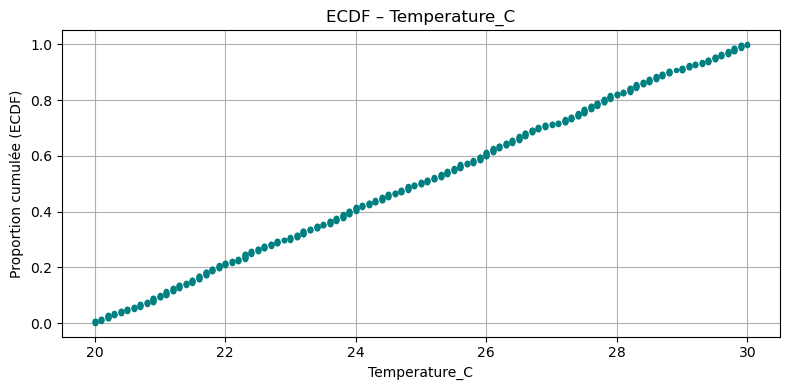

Affichage de l’ECDF pour : Humidity_Percent


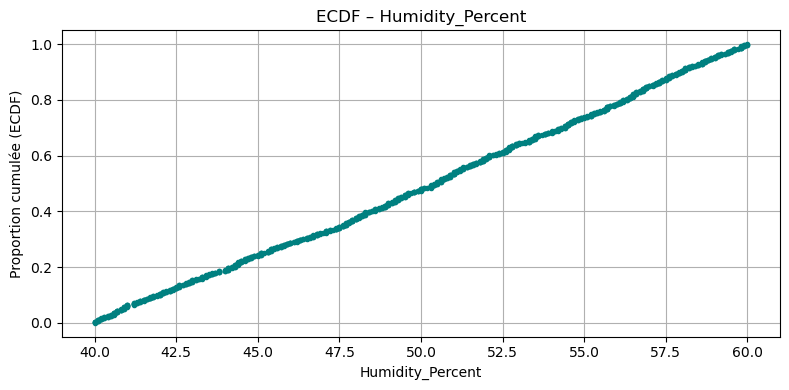

Affichage de l’ECDF pour : Voltage_V


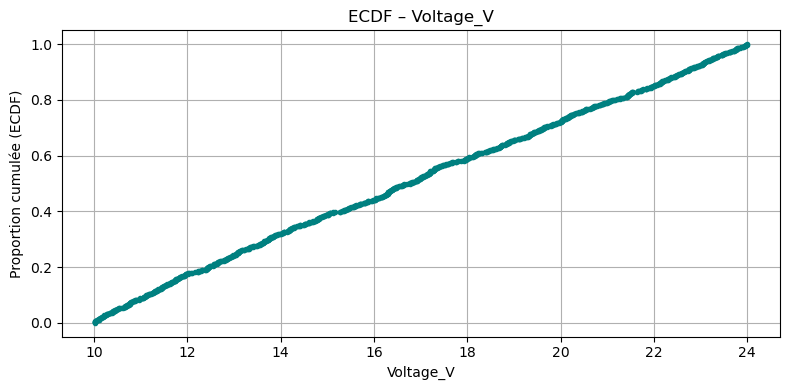

Affichage de l’ECDF pour : Cycle_Time_s


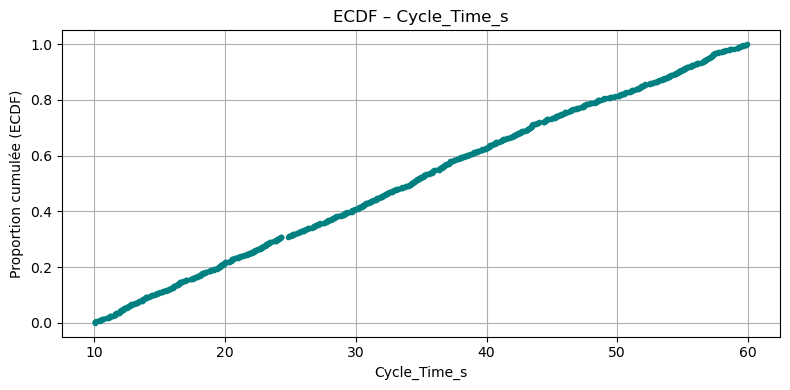

Affichage de l’ECDF pour : Vibration_Amplitude_mm


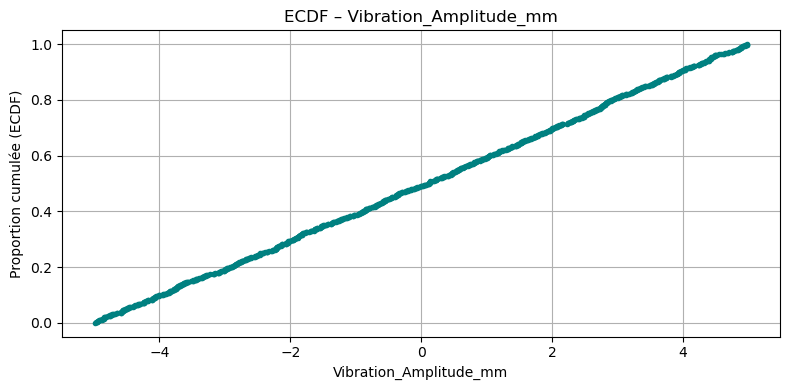

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_ecdf(data, variable):
    """Trace la fonction de répartition empirique (ECDF) d'une variable quantitative."""
    x = np.sort(data[variable])
    y = np.arange(1, len(x) + 1) / len(x)
    
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, marker='.', linestyle='none', color='teal')
    plt.xlabel(variable)
    plt.ylabel('Proportion cumulée (ECDF)')
    plt.title(f"ECDF – {variable}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Liste des variables quantitatives à explorer
quant_vars = ['Temperature_C', 'Humidity_Percent', 'Voltage_V', 'Cycle_Time_s', 'Vibration_Amplitude_mm']

# Affichage des ECDF pour chaque variable
for var in quant_vars:
    print(f"Affichage de l’ECDF pour : {var}")
    plot_ecdf(df, var)


> # II.2. Recherche de corrélation entre la vibration_amplitude et (la température ,l’humidité, la tension, le temps de cycle) 


**Pourquoi chercher une corrélation ?**

L’objectif ici est de vérifier s’il existe une **relation linéaire** entre l’amplitude des vibrations (`Vibration_Amplitude_mm`) et d’autres paramètres comme :
- la température (`Temperature_C`)
- l’humidité (`Humidity_Percent`)
- la tension (`Voltage_V`)
- le temps de cycle (`Cycle_Time_s`)

Comprendre ces relations peut aider à **identifier les causes possibles de variations ou de défauts** dans le processus de fabrication.

---

**Comment procéder ?**

1. **Calculer le coefficient de corrélation de Pearson** : il mesure la **force et la direction** d’une relation linéaire entre deux variables (valeurs entre -1 et +1).
   - +1 → forte corrélation positive
   - -1 → forte corrélation négative
   - 0 → pas de corrélation linéaire

2. **Observer les nuages de points (scatter plots)** pour **visualiser** la relation.

Une corrélation n’implique pas une causalité, mais peut orienter l’analyse.


In [14]:

import seaborn as sns

# ============================
# Étape 1 : Définir les variables à analyser
# ============================

# Liste des variables quantitatives à corréler avec l'amplitude des vibrations
cols_to_check = ['Temperature_C', 'Humidity_Percent', 'Voltage_V', 'Cycle_Time_s']


**Étape 2 – Calcul de la matrice de corrélation**

Cette matrice montre dans quelle mesure deux variables évoluent ensemble.  
Les valeurs obtenues varient entre -1 et 1 :

- proche de **1** → relation positive forte (les deux augmentent ensemble),
- proche de **-1** → relation négative forte (l’une augmente pendant que l’autre diminue),
- proche de **0** → lien très faible ou inexistant.

On considère généralement :
- **|corr| > 0.7** → relation forte,  
- **0.3 ≤ |corr| ≤ 0.7** → relation modérée,  
- **|corr| < 0.3** → relation faible ou négligeable.


In [16]:
# ============================
#  Étape 2 : Calcul de la matrice de corrélation
# ============================

# On ajoute 'Vibration_Amplitude_mm' à la liste pour inclure cette variable cible dans la matrice
correlations = df[cols_to_check + ['Vibration_Amplitude_mm']].corr()
correlations

,Temperature_C,Humidity_Percent,Voltage_V,Cycle_Time_s,Vibration_Amplitude_mm
Temperature_C,1.000000,-0.011900,0.091246,-0.003820,0.033308
Humidity_Percent,-0.011900,1.000000,-0.006761,0.009132,-0.055614
Voltage_V,0.091246,-0.006761,1.000000,-0.015763,-0.003598
Cycle_Time_s,-0.003820,0.009132,-0.015763,1.000000,0.033673
Vibration_Amplitude_mm,0.033308,-0.055614,-0.003598,0.033673,1.000000


**Étape 3 – Visualisation avec une Heatmap**

La matrice de corrélation est visualisée à l’aide d’un **heatmap**.

Cette représentation facilite l’identification rapide :
- des corrélations fortes (positives ou négatives),
- des relations faibles (proches de zéro).

Les couleurs aident à interpréter visuellement les zones d’intérêt.


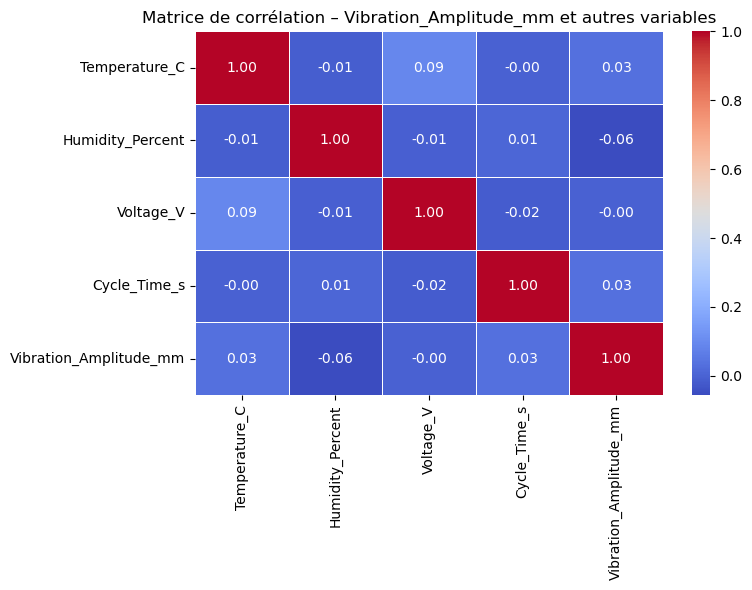

In [17]:
# ============================
# Étape 3 : Visualisation sous forme de heatmap
# ============================

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Matrice de corrélation – Vibration_Amplitude_mm et autres variables")
plt.tight_layout()
plt.show()

**Étape 4 – Extraction des corrélations spécifiques à `Vibration_Amplitude_mm`**

On extrait ici uniquement les valeurs de corrélation entre `Vibration_Amplitude_mm` et les autres variables quantitatives.

Cela permet de cibler directement les variables potentiellement influentes dans le phénomène des vibrations.


In [18]:

# ============================
# Étape 4 : Affichage des corrélations spécifiques à Vibration_Amplitude_mm
# ============================

print(" Corrélations avec Vibration_Amplitude_mm :")
print(correlations['Vibration_Amplitude_mm'].drop('Vibration_Amplitude_mm'))

 Corrélations avec Vibration_Amplitude_mm :
Temperature_C       0.033308
Humidity_Percent   -0.055614
Voltage_V          -0.003598
Cycle_Time_s        0.033673
Name: Vibration_Amplitude_mm, dtype: float64


**Étape 5 – Visualisation des relations avec des nuages de points (Scatterplots)**

Pour chaque variable sélectionnée, un **nuage de points** est tracé contre `Vibration_Amplitude_mm`.

Cela permet de :
- **Visualiser la forme de la relation** (linéaire ou non),
- Détecter des **tendances**, des **anomalies** ou des **groupes** de données.

C’est une étape clé avant de tirer des conclusions sur les relations possibles.


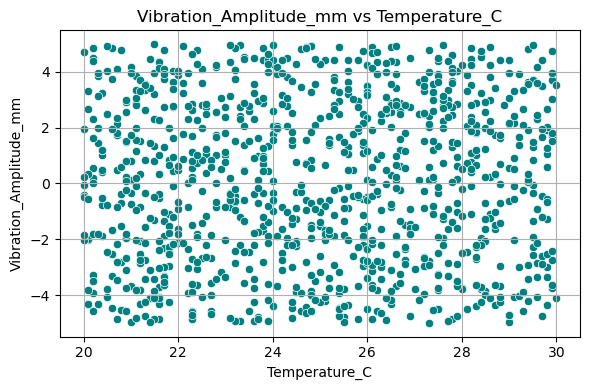

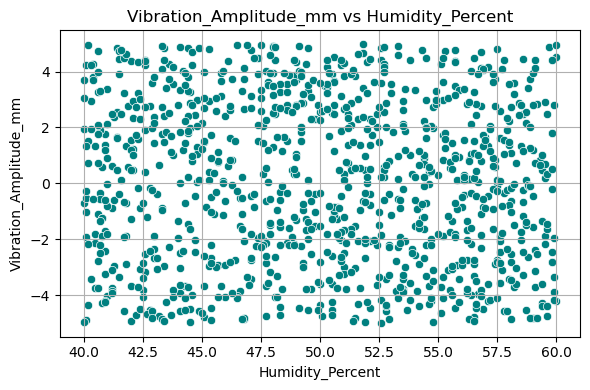

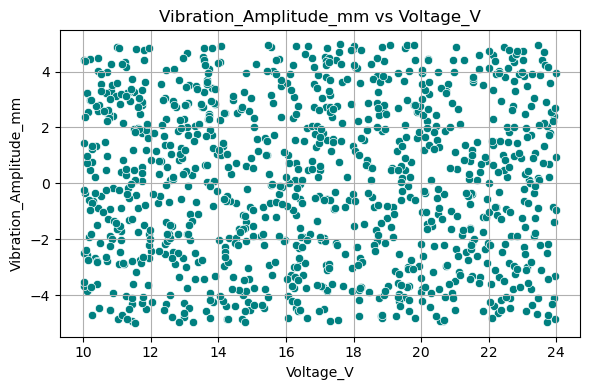

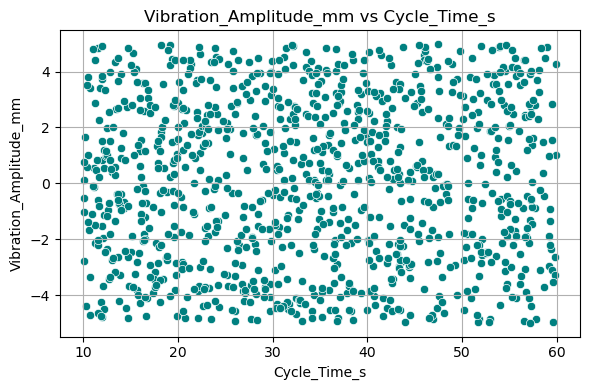

In [19]:
# ============================
# Étape 5 : Visualisation individuelle par nuages de points (scatterplots)
# ============================

for col in cols_to_check:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='Vibration_Amplitude_mm', color='teal')
    plt.title(f'Vibration_Amplitude_mm vs {col}')
    plt.xlabel(col)
    plt.ylabel('Vibration_Amplitude_mm')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

> # II.3 – Interprétation des résultats : Corrélations avec `Vibration_Amplitude_mm`


L’objectif ici est d’évaluer s’il existe une relation significative entre l’amplitude des vibrations et d’autres variables du processus 
compte tenu de ce que  nos venos de faire ci-dessus.

**Résumé des coefficients de corrélation (Pearson) :**

| Variable           | Corrélation avec `Vibration_Amplitude_mm` |
|--------------------|--------------------------------------------|
| Temperature_C       | +0.03 → Très faible positive               |
| Humidity_Percent    | -0.06 → Très faible négative              |
| Voltage_V           | -0.00 → Aucune corrélation                |
| Cycle_Time_s        | +0.03 → Très faible positive              |

**Lecture globale :**

- **Toutes les corrélations sont très faibles (|corr| < 0.1)** : cela signifie qu’il **n’y a pas de relation linéaire claire** 
entre les variables testées et l’amplitude des vibrations.
- Cela est confirmé visuellement par les **nuages de points dispersés**, sans tendance apparente ni structure.

---

> Ces résultats suggèrent que les variations de `Vibration_Amplitude_mm` ne sont **pas expliquées directement** 
par la température, l’humidité, la tension ou le temps de cycle.  
> D'autres facteurs (non mesurés ici) pourraient influencer ce paramètre.



# III. GENERALISATION DES RESULTATS

> # III.1 – Calcul de l'intervalle de confiance (IC) de `Vibration_Amplitude_mm`

L'**intervalle de confiance** est une méthode qui nous permet d’estimer une **fourchette** dans laquelle se trouve **probablement la vraie moyenne** des vibrations, à partir de notre échantillon de données.

---
**Pourquoi choisir un niveau de confiance de **95 %** ?**

Cela signifie que :
> Si on refaisait cette étude 100 fois, **dans 95 cas**, l’intervalle obtenu contiendrait la vraie moyenne réelle.

C’est le **niveau le plus courant en statistique**, car il donne un bon équilibre entre précision et fiabilité.

---

**Mais pourquoi `0.975` dans le calcul ?**

Le niveau de confiance de 95 % correspond à **garder 5 % d'incertitude**.  
On **répartit ces 5 % également de chaque côté** de la moyenne :
- 2.5 % en-dessous (valeurs très faibles),
- 2.5 % au-dessus (valeurs très hautes).

C’est pour ça qu’on utilise `t.ppf(0.975, df)`, car on veut trouver la valeur de t qui **laisse 97.5 % des cas en-dessous** (et donc 2.5 % au-dessus). Cela nous donne la **marge à ajouter ou à retirer** autour de la moyenne.

---

Avec cet intervalle de confiance, on peut dire :
> « On est raisonnablement sûr que la **moyenne réelle des vibrations** dans tout le processus de production se situe quelque part dans cette fourchette. »

Cela rend notre estimation **plus robuste** que si on se fiait seulement à la moyenne brute.


In [20]:

import scipy.stats as stats

# =======================================
# préparation des données
# =======================================

vibration = df["Vibration_Amplitude_mm"].dropna()
n = len(vibration)

# =======================================
# Calcul des paramètres statistiques
# =======================================
mean_vib = np.mean(vibration)           # Moyenne de l'échantillon
std_vib = np.std(vibration, ddof=1)     # Écart-type corrigé (ddof=1 pour l'échantillon)

# Valeur critique t de Student pour un IC à 95 %
t_crit = stats.t.ppf(0.975, df=n-1)     # 97.5% car IC bilatéral

# Marge d'erreur
margin_error = t_crit * std_vib / np.sqrt(n)

# Intervalle de confiance à 95%
ic_mean = (mean_vib - margin_error, mean_vib + margin_error)

# =======================================
# Affichage du résultat
# =======================================
print(f"   Intervalle de confiance à 95% de la moyenne des vibrations :")
print(f"   Moyenne estimée : {mean_vib:.5f}")
print(f"   Intervalle de confiance : [{ic_mean[0]:.5f}, {ic_mean[1]:.5f}]")


   Intervalle de confiance à 95% de la moyenne des vibrations :
   Moyenne estimée : 0.03159
   Intervalle de confiance : [-0.14430, 0.20749]


> # III.2 – Intervalle de confiance Bootstrap du ratio moyenne / max

Pour aller plus loin dans la **généralisation de nos résultats**, on applique ici une méthode appelée **Bootstrap**, qui nous permet d’estimer l’incertitude autour d’un ratio particulier :  
le **rapport entre la moyenne et la valeur maximale des vibrations**.

---

**Pourquoi ce ratio ?**

Ce ratio nous renseigne sur :
- la **stabilité de la moyenne** par rapport aux extrêmes,
- la **sensibilité de notre système de production** à des valeurs très élevées.

Un ratio faible signifie que **la moyenne est fortement influencée par quelques valeurs extrêmes** (peu représentatives),  
alors qu’un ratio plus élevé indique que la moyenne est **plus représentative du comportement global**.

---

**Pourquoi le bootstrap ?**

Il est difficile de construire un intervalle de confiance classique pour une statistique comme `moyenne / max`.  
Le **Bootstrap** contourne cela en :

1. Reproduisant des échantillons aléatoires depuis les données existantes (avec remise),
2. Calculant le ratio pour chaque échantillon,
3. Observant la distribution des résultats pour en déduire un **intervalle de confiance à 95 %**.

---
 
> Cet intervalle nous donne une **plage plausible** dans laquelle se situe ce ratio,  
> ce qui permet de **mesurer la fiabilité de la moyenne** par rapport à des pics inhabituels dans le processus de fabrication.


In [21]:

# =====================================
# Bootstrap pour l’intervalle de confiance du ratio moyenne / max
# =====================================

n_iterations = 10000       # Nombre de répétitions bootstrap
ratios = []                # Liste pour stocker les ratios
n = len(vibration)         # Taille de l’échantillon d’origine

for _ in range(n_iterations):
    # Tirage d’un échantillon aléatoire avec remise
    sample = vibration.sample(n, replace=True)

    # Calcul du ratio pour cet échantillon
    ratio = np.mean(sample) / np.max(sample)
    ratios.append(ratio)

# Calcul des bornes de l’intervalle de confiance à 95 %
lower_bound = np.percentile(ratios, 2.5)
upper_bound = np.percentile(ratios, 97.5)

# Affichage du résultat
print("IC Bootstrap à 95% pour le ratio moyenne / max :")
print(f"[{lower_bound:.5f}, {upper_bound:.5f}]")


IC Bootstrap à 95% pour le ratio moyenne / max :
[-0.02921, 0.04078]


> # III.3 – Interprétation des intervalles de confiance

Nous avons obtenu deux résultats clés :

---

1. **Intervalle de confiance à 95 % de la moyenne des vibrations**
- **Moyenne estimée** : 0.0316 mm  
- **IC** : [-0.1443 mm ; 0.2075 mm]

**Interprétation** :
> Cet intervalle contient des valeurs **proches de zéro** (et même légèrement négatives).  
> Cela signifie que, statistiquement, la **vraie moyenne des vibrations** dans le système peut être **très faible**, voire **négative** (par exemple en cas de bruit ou de signal inversé).

Cela suggère que l’intensité moyenne des vibrations est **globalement faible**, mais avec une **grande variabilité**.

---

2. **Intervalle de confiance Bootstrap du ratio moyenne / max**
- **Ratio estimé** ≈ compris entre **-0.0292 et 0.0408**

**Interprétation** :
> Ce ratio très faible indique que la **moyenne est beaucoup plus petite que les valeurs maximales**.  
> Cela reflète une **grande dispersion** dans les données, où **quelques valeurs extrêmes influencent fortement la distribution**.

---


Ces deux résultats montrent que :
- La moyenne des vibrations est **peu élevée mais instable**, car elle peut varier de manière importante d’un échantillon à l’autre.
- Le **rapport faible entre moyenne et maximum** confirme la **présence de valeurs extrêmes** dans les vibrations enregistrées, ce qui peut indiquer des **pics inhabituels** dans le processus de fabrication.

> Ces intervalles de confiance nous permettent de **généraliser nos observations** au-delà de l’échantillon, **en intégrant l’incertitude statistique**.  
> Ils soulignent que les **vibrations sont faibles en moyenne**, mais **souvent perturbées par des pics ponctuels**, ce qui pourrait nécessiter une attention particulière (maintenance, recalibrage, surveillance...).


# IV HYPOTHESES ET TEST STATISTIQUE


**Qu’est-ce qu’une hypothèse statistique ?**

Une hypothèse statistique est une idée que l’on veut vérifier avec des données.  
- **H0 (hypothèse nulle)** : il n’y a pas de lien ou de différence.  
- **H1 (hypothèse alternative)** : il y a un lien ou une différence.

On réalise des tests statistiques pour savoir si on peut rejeter H0, c’est-à-dire si les données montrent suffisamment de preuves pour accepter H1.

---

**Pourquoi formuler des hypothèses ?**

Pour pouvoir répondre à des questions comme :  
- Est-ce que la température influence le nombre de défauts ?  
- Est-ce que le nombre de défauts varie selon la machine utilisée ?

Cela nous aide à choisir le test statistique adapté à la situation, afin de prendre une décision fiable basée sur les données.

---

**Comment choisir un test statistique ?**

Le choix du test dépend du type de variables et de la question posée :  
- Si on cherche une relation entre deux variables quantitatives continues, on choisira un test de corrélation.  
- Si on compare des moyennes entre plusieurs groupes, on utilisera un test comme l’ANOVA.

Chaque test a ses règles, son calcul, et sa manière de confirmer ou d’infirmer une hypothèse.

---

**Comment interpréter les résultats ?**

- Si on rejette H0 (avec un seuil souvent fixé à p-value < 0.05), cela signifie qu’il y a un lien ou une différence significative dans les données.  
- Sinon, on ne peut pas conclure à un lien ou une différence avec ces données.

---

**Hypothèses et tests choisis**

***Hypothèse 1 : Relation entre température et nombre de défauts***

- Variables : Température (quantitative), Nombre de défauts (quantitative)  
- Objectif : vérifier s’il y a une relation linéaire entre les deux.  
- Test choisi : **Corrélation de Pearson**  
- Pourquoi ? Parce que ce test mesure la force et le sens d’une relation linéaire entre deux variables numériques.  
- Formulation :  
  - H0 : Pas de relation (corrélation = 0)  
  - H1 : Il y a une relation (corrélation ≠ 0)

---

**Hypothèse 2 : Différence du nombre de défauts selon les machines**

- Variables : Nombre de défauts (quantitative), Machine (catégorielle)  
- Objectif : comparer les moyennes entre plusieurs machines.  
- Test choisi : **ANOVA**  
- Pourquoi ? Parce que l’ANOVA teste s’il existe une différence significative entre les moyennes de plusieurs groupes.  
- Formulation :  
  - H0 : Les moyennes sont toutes égales  
  - H1 : Au moins une moyenne est différente



In [23]:
print("Test pour l’Hypothèse 1 : Corrélation de Pearson")
print("Test pour l’Hypothèse 2 : ANOVA (Analyse de la variance)")

Test pour l’Hypothèse 1 : Corrélation de Pearson
Test pour l’Hypothèse 2 : ANOVA (Analyse de la variance)



> # Analyse du test de corrélation de Pearson et préparation pour le test ANOVA

**Test de corrélation de Pearson**

Nous avons utilisé le test de corrélation de Pearson pour vérifier s’il existe une relation linéaire entre la température (`Temperature_C`) et le nombre de défauts (`Defect_Count`).



In [24]:
# Importation des fonctions nécessaires depuis scipy.stats
from scipy.stats import pearsonr, f_oneway

# Test de corrélation de Pearson
correlation_coefficient, p_value_pearson = pearsonr(df['Temperature_C'], df['Defect_Count'])

# Préparation des données pour le test ANOVA
machine_ids = df['Machine_ID'].unique()
defect_counts_by_machine = [df[df['Machine_ID'] == machine]['Defect_Count'] for machine in machine_ids]

# Affichage des résultats
print(f"Corrélation de Pearson entre Temperature_C et Defect_Count :")
print(f"  Coefficient de corrélation : {correlation_coefficient:.4f}")
print(f"  P-value : {p_value_pearson:.4f}")

print("\nDonnées préparées pour l’ANOVA (quelques entrées par machine) :")
for i, machine in enumerate(machine_ids):
    print(f"  {machine} : {defect_counts_by_machine[i].head().tolist()}")


Corrélation de Pearson entre Temperature_C et Defect_Count :
  Coefficient de corrélation : -0.0021
  P-value : 0.9462

Données préparées pour l’ANOVA (quelques entrées par machine) :
  M_003 : [0, 2, 0, 2, 1]
  M_004 : [2, 2, 0, 1, 0]
  M_001 : [1, 2, 0, 1, 2]
  M_002 : [0, 1, 2, 1, 0]



- **Coefficient de corrélation** : -0.0021  
  Ce coefficient est très proche de 0, ce qui signifie qu’il n’y a pratiquement **aucune relation linéaire** entre la température et le nombre de défauts dans les données.

- **P-value** : 0.9462  
  La p-value est très élevée (bien au-dessus de 0.05), ce qui signifie que nous **ne rejetons pas l’hypothèse nulle** (H0).  
  Autrement dit, il n’y a pas de preuve statistiquement significative d’une relation entre la température et le nombre de défauts.

Les données ne montrent pas de lien linéaire entre la température et le nombre de défauts. On ne peut pas dire que la température influe sur le nombre de défauts avec les données actuelles.

---

**Préparation des données pour le test ANOVA**

Pour l’Hypothèse 2, qui consiste à comparer la moyenne du nombre de défauts selon les machines, nous avons extrait les données de `Defect_Count` pour chaque machine (`Machine_ID`) :

- Machines identifiées : `M_003`, `M_004`, `M_001`, `M_002`

- valeurs du nombre de défauts pour chaque machine (quelques premières données) :

  - `M_003` : [0, 2, 0, 2, 1]  
  - `M_004` : [2, 2, 0, 1, 0]  
  - `M_001` : [1, 2, 0, 1, 2]  
  - `M_002` : [0, 1, 2, 1, 0]

Ces groupes sont prêts pour être analysés avec le test ANOVA afin de déterminer si la moyenne du nombre de défauts diffère significativement selon la machine utilisée.


> ## Réalisation du test ANOVA

Nous effectuons le test ANOVA pour vérifier s’il existe une différence significative dans la moyenne du nombre de défauts selon les machines.

In [25]:
# Effectuer le test ANOVA (Analyse de la variance)
# Le symbole * sert à décomposer la liste des groupes en arguments séparés
f_statistic, p_value_anova = f_oneway(*defect_counts_by_machine)

# Afficher les résultats
print("Test ANOVA sur le Nombre de Défauts selon les différentes Machines :")
print(f"  Statistique F : {f_statistic:.4f}")
print(f"  P-value : {p_value_anova:.4f}")

Test ANOVA sur le Nombre de Défauts selon les différentes Machines :
  Statistique F : 0.4929
  P-value : 0.6873




- La statistique F obtenue est **0.4929**.  
- La p-value associée est **0.6873**, ce qui est bien supérieur au seuil classique de 0.05.

Cela signifie que nous **ne pouvons pas rejeter l’hypothèse nulle (H0)** qui affirme que les moyennes du nombre de défauts sont identiques pour toutes les machines.

  
Avec ces données, il n’y a pas de preuve statistique que le nombre moyen de défauts varie selon la machine utilisée. En d’autres termes, aucune machine ne semble produire plus ou moins de défauts que les autres de façon significative.


> # Résumé des tests statistiques et interprétation

In [27]:
# Niveau de signification
alpha = 0.05

# Conclusion pour l'Hypothèse 1 (Corrélation de Pearson)
print("Conclusion pour l’Hypothèse 1 (Corrélation de Pearson) :")
if p_value_pearson < alpha:
    print(f"  La p-value ({p_value_pearson:.4f}) est inférieure au niveau de signification ({alpha}).")
    print("  Rejeter l'hypothèse nulle.")
    print("  Conclusion : Il existe une relation linéaire statistiquement significative entre Temperature_C et Defect_Count.")
else:
    print(f"  La p-value ({p_value_pearson:.4f}) n'est pas inférieure au niveau de signification ({alpha}).")
    print("  Ne pas rejeter l'hypothèse nulle.")
    print("  Conclusion : Il n'y a pas de relation linéaire statistiquement significative entre Temperature_C et Defect_Count.")

print("\nConclusion pour l'Hypothèse 2 (ANOVA) :")
# Conclusion pour l'Hypothèse 2 (ANOVA)
if p_value_anova < alpha:
    print(f"  La p-value ({p_value_anova:.4f}) est inférieure au niveau de signification ({alpha}).")
    print("  Rejeter l'hypothèse nulle.")
    print("  Conclusion : La moyenne de Defect_Count est différente pour au moins une catégorie de Machine_ID.")
else:
    print(f"  La p-value ({p_value_anova:.4f}) n'est pas inférieure au niveau de signification ({alpha}).")
    print("  Ne pas rejeter l'hypothèse nulle.")
    print("  Conclusion : Il n'y a pas de différence statistiquement significative dans la moyenne de Defect_Count entre toutes les catégories de Machine_ID.")

Conclusion pour l’Hypothèse 1 (Corrélation de Pearson) :
  La p-value (0.9462) n'est pas inférieure au niveau de signification (0.05).
  Ne pas rejeter l'hypothèse nulle.
  Conclusion : Il n'y a pas de relation linéaire statistiquement significative entre Temperature_C et Defect_Count.

Conclusion pour l'Hypothèse 2 (ANOVA) :
  La p-value (0.6873) n'est pas inférieure au niveau de signification (0.05).
  Ne pas rejeter l'hypothèse nulle.
  Conclusion : Il n'y a pas de différence statistiquement significative dans la moyenne de Defect_Count entre toutes les catégories de Machine_ID.




**Que cherchions-nous à vérifier ?**

Nous voulions répondre à deux questions importantes :  
1. Est-ce que la température influence le nombre de défauts ?  
2. Est-ce que le nombre de défauts est différent selon la machine utilisée ?

Pour cela, nous avons formulé deux hypothèses à tester avec des méthodes statistiques.

---

**Qu’avons-nous utilisé pour tester ces hypothèses ?**

- **Test de corrélation de Pearson** :  
  Ce test sert à vérifier s’il existe une relation linéaire entre deux variables numériques, ici la température et le nombre de défauts.  
  - Le **coefficient de corrélation** mesure la force et le sens de la relation (allant de -1 à 1).  
  - La **p-value** nous dit si cette relation est statistiquement significative (on regarde si elle est plus petite que 0,05).

- **Test ANOVA (Analyse de la variance)** :  
  Ce test sert à comparer la moyenne d’une variable numérique entre plusieurs groupes, ici le nombre de défauts entre différentes machines.  
  - La **statistique F** mesure si la variation entre les groupes est plus grande que celle à l’intérieur des groupes.  
  - La **p-value** indique si cette différence est significative ou pas.

---

**Que montrent nos résultats ?**

### 1. Résultats du test de corrélation de Pearson

- Coefficient de corrélation = **-0,0021** (très proche de zéro, donc pas de lien).  
- P-value = **0,9462** (beaucoup plus grande que 0,05).

**Interprétation :**  
Cela signifie que nous **ne pouvons pas dire qu’il y a un lien entre la température et le nombre de défauts**. La température ne semble pas influencer le nombre de défauts dans nos données.

---

### 2. Résultats du test ANOVA

- Statistique F = **0,4929** (plutôt faible).  
- P-value = **0,6873** (bien plus grande que 0,05).

**Interprétation :**  
Cela veut dire que la différence moyenne du nombre de défauts entre les machines **n’est pas significative**. On ne peut pas affirmer qu’une machine produit plus ou moins de défauts qu’une autre.

---

## Qu’en retenir ?

- **On n’a pas trouvé de preuve que la température ou la machine affectent le nombre de défauts**, avec les données que nous avons.  
- **Les hypothèses disant qu’il y a un lien ou une différence ont été rejetées.**  
- Ces résultats ne disent pas que c’est impossible, mais que nos données ne montrent pas ces effets.

---

## Prochaines étapes possibles

- Étudier d’autres facteurs qui pourraient influencer les défauts, comme la vitesse de production ou la qualité des matériaux.  
- Vérifier si des relations non linéaires (plus compliquées) existent entre la température et les défauts.  
- Collecter plus de données pour avoir des résultats plus précis.

---

*Ainsi, nous avons appris comment utiliser des tests statistiques simples pour vérifier des idées, et comment lire les résultats pour prendre des décisions basées sur les données.*


# V. VISUALISATION DES VARIABLES CLES

**Pourquoi visualiser les données ?**

Visualiser les données permet de mieux comprendre leur comportement, leurs tendances, et leurs relations.  
Cela aide aussi à détecter des anomalies, des patterns, ou des différences entre groupes que des simples chiffres ne révèlent pas facilement.

---

**ypes de variables et graphiques adaptés**

| Type de variable           | Exemple dans notre dataset          | Graphique recommandé               | Objectif de la visualisation                      |
|---------------------------|-----------------------------------|----------------------------------|--------------------------------------------------|
| **Quantitative continue** | Temperature_C, Humidity_Percent, Vibration_Amplitude_mm, Current_mA, Voltage_V, Cycle_Time_s | Histogramme, Boîte à moustaches (boxplot), Nuage de points (scatter plot) | Voir la distribution, la variation et la présence d’outliers |
| **Quantitative discrète** | Defect_Count                      | Histogramme, Barplot              | Visualiser la fréquence des défauts               |
| **Qualitative (catégorielle)** | Machine_ID, Operator_ID, Piece_ID | Diagramme en barres (bar chart)  | Comparer les effectifs ou moyennes par catégorie  |


---

## Graphiques proposés et leur interprétation

### 1. Histogramme des variables numériques

- Permet de voir comment les données sont réparties (par exemple, la température ou l’humidité).  
- On peut détecter si les valeurs sont centrées autour d’une moyenne ou si elles sont étalées, et aussi repérer des valeurs extrêmes.

### 2. Boîte à moustaches (boxplot)

- Donne un résumé statistique visuel : médiane, quartiles, étendue, et valeurs aberrantes (outliers).  
- Utile pour comparer la répartition d’une variable numérique entre plusieurs groupes (par exemple, le nombre de défauts par machine).

### 3. Diagrammes en barres (bar charts)

- Pour les variables catégorielles, montre la fréquence ou la moyenne d’une autre variable.  
- Par exemple, le nombre de pièces produites par machine ou par opérateur.

### 4. Nuages de points (scatter plots)-Nious l'avons effectué au point II.2. Recherche de corrélation entre la vibration_amplitude et (la température ,l’humidité, la tension, le temps de cycle)

- Visualisent la relation entre deux variables numériques.  
- Par exemple, température vs nombre de défauts, pour voir s’il y a un lien ou une tendance.


---



- Ces graphiques nous aideront à comprendre si certaines machines ou opérateurs sont associés à plus de défauts.  
- Ils permettront de voir si des variables comme la température ou les vibrations influencent la qualité.  
- L’analyse temporelle pourra montrer des tendances ou des anomalies à certains moments.

---

*Dans la prochaine étape, nous réaliserons ces visualisations pour mieux explorer nos données.*


> ### 1. Histogrammes des variables numériques continues

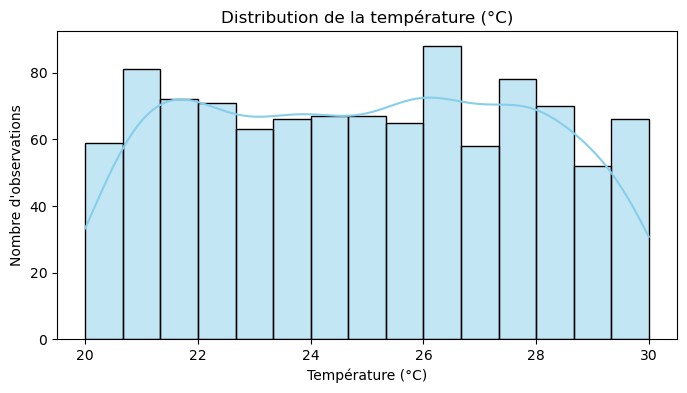

In [28]:


import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme de la température
plt.figure(figsize=(8,4))
sns.histplot(df['Temperature_C'], bins=15, kde=True, color='skyblue')
plt.title('Distribution de la température (°C)')
plt.xlabel('Température (°C)')
plt.ylabel('Nombre d\'observations')
plt.show()


### Interprétation de l’histogramme avec courbe de densité

L’histogramme montre la fréquence des observations pour différentes plages de températures. Chaque barre représente le nombre de jours où la température se situe dans cet intervalle.

La courbe bleue superposée est une estimation de la **densité de probabilité** (appelée aussi *kernel density estimate* ou KDE).  
Elle donne une idée plus lisse et continue de la distribution des températures, sans les "coupures" dues aux barres.

- Si la courbe forme une bosse unique et régulière, cela signifie que la température suit une distribution proche d’une distribution normale (en forme de cloche).  
- Si elle a plusieurs pics ou est irrégulière, cela peut indiquer plusieurs groupes de températures différentes ou des anomalies.

Ici, la courbe bleue permet de visualiser la tendance générale de la température dans les données, au-delà des simples barres de l’histogramme.


### 2. Boxplot du nombre de défauts par machine

C:\Users\Elie Le Ntwari\AppData\Local\Temp\ipykernel_13948\1442771916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Machine_ID', y='Defect_Count', data=df, palette='Set2')


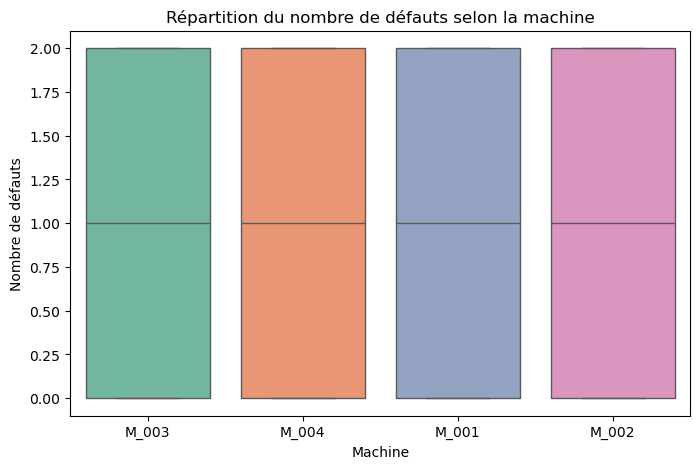

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Machine_ID', y='Defect_Count', data=df, palette='Set2')
plt.title('Répartition du nombre de défauts selon la machine')
plt.xlabel('Machine')
plt.ylabel('Nombre de défauts')
plt.show()


### Interprétation du boxplot du nombre de défauts par machine

Le boxplot (ou boîte à moustaches) permet de visualiser la répartition des valeurs du **nombre de défauts** pour chaque machine.

Dans notre graphique :

- Toutes les **boîtes ont la même hauteur**, ce qui indique que la distribution du nombre de défauts est très similaire entre les machines.
- La **valeur minimale** est 0 et la **valeur maximale** est 2 pour toutes les machines.
- La **ligne au milieu** de chaque boîte correspond à la **médiane**, qui est ici 1 pour toutes les machines. Cela signifie que, pour chaque machine, **la moitié des observations ont un nombre de défauts inférieur ou égal à 1**.
- Les **quartiles** (limites de la boîte) montrent que la majorité des défauts sont situés entre 0 et 2 pour toutes les machines.
- Il **n'y a pas de points en dehors des moustaches**, donc **aucune valeur extrême (outlier)** n'a été détectée.

---
Le nombre de défauts est globalement **réparti de la même manière** pour toutes les machines.  
Aucune machine ne semble produire significativement plus ou moins de défauts qu'une autre, du moins selon la distribution représentée ici.


### 3. Barplot du nombre de pièces produites par opérateur

C:\Users\Elie Le Ntwari\AppData\Local\Temp\ipykernel_13948\1268964774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=operator_counts.index, y=operator_counts.values, palette='pastel')


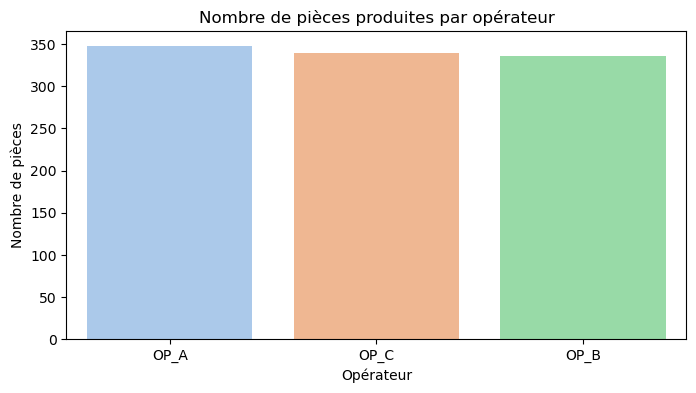

In [30]:
plt.figure(figsize=(8,4))
operator_counts = df['Operator_ID'].value_counts()
sns.barplot(x=operator_counts.index, y=operator_counts.values, palette='pastel')
plt.title('Nombre de pièces produites par opérateur')
plt.xlabel('Opérateur')
plt.ylabel('Nombre de pièces')
plt.show()


### Interprétation du barplot du nombre de pièces par opérateur

Ce graphique montre combien de pièces chaque opérateur a produites.

- **OP_A** est l’opérateur qui a produit le plus grand nombre de pièces.
- **OP_C** et **OP_B** ont produit **légèrement moins**, avec une différence **très faible** qui n’est presque pas visible à l’œil nu.

---
Tous les opérateurs semblent avoir une charge de travail **assez équilibrée**.  
Même si OP_A est légèrement au-dessus, les trois opérateurs ont presque le **même niveau de production**.  
Il n’y a donc **pas de déséquilibre important** dans la répartition du travail entre les opérateurs.


### Interprétation du barplot du nombre de pièces par opérateur

Ce graphique montre combien de pièces chaque opérateur a produites.

- **OP_A** est l’opérateur qui a produit le plus grand nombre de pièces.
- **OP_C** et **OP_B** ont produit **légèrement moins**, avec une différence **très faible** qui n’est presque pas visible à l’œil nu.

**Conclusion :**  
Tous les opérateurs semblent avoir une charge de travail **assez équilibrée**.  
Même si OP_A est légèrement au-dessus, les trois opérateurs ont presque le **même niveau de production**.  
Il n’y a donc **pas de déséquilibre important** dans la répartition du travail entre les opérateurs.


# Conclusion générale


Cette étude sur le processus de **fabrication électronique** visait à mieux comprendre les facteurs influençant la **qualité de production** et les **performances des machines**, à partir de la base de données `donnees_fabrication_electronique`.

---

### 1. Analyse descriptive et compréhension des données

- Exploration de la structure des données : types, valeurs manquantes, résumés statistiques.
- Calculs de moyennes simples et groupées pour observer les tendances générales.
- Utilisation des **fonctions de répartition empirique (ECDF)** pour visualiser la distribution des variables quantitatives.

---

### 2. Corrélations et relations entre variables

- Les **corrélations entre l’amplitude des vibrations** et d’autres variables (température, humidité, voltage, temps de cycle) étaient **faibles à négligeables** (coefficients proches de 0).
- Les visualisations par **nuages de points** et **matrice de corrélation** n’ont révélé aucune tendance linéaire notable.

---

### 3. Généralisation des résultats

- Un **intervalle de confiance à 95 %** pour la moyenne des vibrations a été calculé pour estimer la plage probable de la vraie moyenne.
- Un **échantillonnage Bootstrap** a permis de recalculer un **intervalle de confiance pour le ratio moyenne / maximum**, renforçant la robustesse de l’analyse.

---

### 4. Tests d’hypothèses

#### 🔹 Hypothèse 1 : Température vs Défauts
- **Test utilisé** : Corrélation de Pearson.
- **Résultat** : Coefficient ≈ -0.0021, **p-value ≈ 0.9462** → aucune relation significative.

#### 🔹 Hypothèse 2 : Défauts selon la machine
- **Test utilisé** : ANOVA.
- **Résultat** : Statistique F ≈ 0.49, **p-value ≈ 0.6873** → pas de différence significative entre les machines.

---

### 5. Visualisations

- Des graphiques simples et efficaces (histogrammes, boxplots, scatterplots) ont facilité l’interprétation.
- Ils confirment la **stabilité globale du processus** avec peu de signaux critiques détectés.

---


> Dans ce jeu de données, **aucune variable n’est apparue comme fortement liée** aux défauts de production ni aux vibrations.  
> Le processus semble **globalement stable**, sans variations significatives d’une machine à l’autre ou selon les paramètres mesurés.
